In [3]:
import os
import pandas as pd
import numpy as np
pd.options.display.max_columns=999
pd.options.display.max_rows=999

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import plotly.express as px

from sklearn.manifold import TSNE

from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

### Load & display data
We'll load the stored product embedding stored in .csv format. The embedding dimension is 500.

In [12]:
# for running on Google colab
# !git clone https://github.com/witchapong/product-embedding-viz.git
# %cd product-embedding-viz

In [14]:
# load product embedding from csv file
prod_emb_df = pd.read_csv('product_embedding_sim.csv')
prod_emb_df.head()

,sku_name,cat,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499
0,กรีนคอรัล 150กรัม,Fruit & Vegetables,229.539400,200.491930,350.73074,-104.030540,59.170730,252.575840,-182.71492,-354.06150,239.169280,156.983410,-132.759500,110.659744,-37.827133,-78.673706,-218.182220,-112.930570,9.596637,255.228090,-407.96880,159.94400,385.22980,-491.42316,-513.06450,73.032295,72.564080,207.420520,-152.553990,133.691670,-233.84262,-248.611270,-245.989790,-282.586300,95.310005,-36.44902,-105.93352,-11.427590,262.059780,219.66899,214.470500,199.09685,201.342970,-260.808350,395.318270,47.665527,243.85696,20.024977,3.770799,-170.769060,-321.728500,157.078050,-359.39110,-129.755810,279.177300,34.451885,-164.63283,-345.211330,-39.973570,137.223050,-69.754684,-146.49016,-88.940445,-52.350520,-139.054760,-102.952980,249.58208,-113.325935,11.910062,-37.876926,-120.19416,-275.809170,-116.548180,-326.750200,-164.479780,-160.23088,98.350880,107.395710,-365.446470,204.71779,351.766630,172.14766,-47.432228,394.236100,120.285706,54.597736,34.646465,-533.23550,154.28305,-203.42064,89.165600,88.257920,-420.24960,140.466800,445.891020,11.498174,-27.077045,-8.156808,544.215200,-277.956800,-158.39085,109.11044,-167.00777,90.450530,-8.521501,84.543010,-498.75070,-28.448906,-67.213460,107.00834,-100.311200,59.125664,-21.77847,104.800910,-145.771910,-87.488900,-232.335510,-278.55356,411.95273,63.458088,141.728730,-326.475430,-184.785780,-491.048900,-135.533190,-58.802086,-400.937770,117.219475,-165.59999,-300.764700,200.789780,-68.087480,184.910980,-147.63075,59.757630,-488.37906,11.805773,165.683260,42.589516,61.139984,-95.515710,238.184600,-230.85050,-173.737460,193.86147,-348.43640,483.190770,-248.898280,87.324730,-104.794586,285.824680,-498.73030,-41.754543,126.537766,-8.462153,26.075562,73.397780,-156.314450,464.497700,-7.927796,-123.459816,-348.50717,-430.98907,-61.706180,64.226850,-438.66632,440.48386,136.805860,-291.15833,286.856380,-145.06396,53.529010,254.84059,90.858950,104.849060,-99.393200,85.942085,-195.43703,33.911102,-152.059620,-270.12405,260.70828,-240.95801,330.31440,-357.32947,-50.29775,118.87422,26.410141,123.274130,61.550137,-328.481660,-1

In [15]:
prod_emb_df.cat.value_counts()

Fresh Food & Bakery     10
Snacks & Desserts       10
Household & Pet         10
Health & Beauty Care    10
Pantry & Ingredients    10
Mom & Kids              10
Beer,Wine & Spirits     10
Meat & Seafood          10
Fruit & Vegetables      10
Beverages               10
Name: cat, dtype: int64

### Product embedding visualisation by product categories
Next we'll visualise the dimension-reduced/compressed version of product embedding using TSNE to see how product embeddings of diffrent categories lie in latent space

In [24]:
tsne_df = pd.read_csv('product_tsne_embedding_sim.csv')

fig = px.scatter(tsne_df, x='0', y='1',color='cat', hover_data=['sku_name'],width=800,
                   height=800,opacity=0.8)
fig.show()

### Product embedding query and arithmetic
We could query similar products using product embedding for similar product recommendation. At the same time, product embeddings could be combined through arithmetic operations(+/-/*)

In [20]:
def plot_with_labels(low_dim_embs, labels, filename=None, figsize=(10,10),
                    axis_lims = None):
    assert low_dim_embs.shape[0] >= len(labels), "More labels than embeddings"
    plt.figure(figsize=figsize)  # in inches
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i, :]
        plt.scatter(x, y)
        prop = fm.FontProperties(fname=f'THSarabunNew.ttf',size=20)
        plt.annotate(label,
                 fontproperties=prop,
                 xy=(x, y),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
    if axis_lims is not None: plt.axis(axis_lims)
    if filename: plt.savefig(filename)

Load product embedding to Gensim's KeyedVectors

In [21]:
# replace space to underscore -> for avoiding some format conversion error
prod_emb_df['sku_name'] = prod_emb_df['sku_name'].fillna('na').map(lambda x:x.replace(' ','_'))
tsne_df['sku_name'] = tsne_df['sku_name'].fillna('na').map(lambda x:x.replace(' ','_'))

os.makedirs('tmp',exist_ok=True)
# save product embedding as .txt format
prod_emb_df.drop('cat',axis=1).to_csv('tmp/product_embedding_sim.txt',sep=' ',index=False, header=False)

# convert from glove format (currently saved .txt file to word2vec format)
_ = glove2word2vec('tmp/product_embedding_sim.txt', 'tmp/product_embedding_sim_gensim.txt')

model = KeyedVectors.load_word2vec_format('tmp/product_embedding_sim_gensim.txt')

Create function fro querying full product name by text

In [22]:
# helper function for product full name query
def get_product_full_name(query, df, col):
    return df[df[col].map(lambda x:query in x)][col].values

In [23]:
get_product_full_name('โซดา',prod_emb_df,'sku_name')

array(['คาลพิสแลคโตะโซดาเครื่องดื่มอัดลมรสนมเปรี้ยวกลิ่นฮันนี่เลมอน_245มล'],
      dtype=object)

Whiskey + soda => Beer

In [28]:
model.most_similar_cosmul(positive=['จอห์นนี่วอคเกอร์แบลคเลเบิ้ลวิสกี้_1ลิตร','สิงห์โซดาเครื่องดื่ม_325มล_แพค_6'],
                          topn=20)

[('สิงห์เบียร์ขวดใหญ่_620ซีซี', 0.8387982249259949),
 ('สิงห์เบียร์กระป๋อง_320ซีซี_แพค_6', 0.8317778706550598),
 ('สิงห์เบียร์กระป๋อง_490ซีซี', 0.8223471641540527),
 ('สิงห์เบียร์ขวด_500ซีซี', 0.8207093477249146),
 ('สิงห์โซดาขวดเล็ก_325ซีซี_แพค_24', 0.8183379173278809),
 ('สิงห์เบียร์กระป๋อง_320ซีซี_แพค_24', 0.8150133490562439),
 ('สิงห์เบียร์ไลท์ขวด_620ซีซี', 0.8145329356193542),
 ('สิงห์เบียร์ขวดเล็ก_320ซีซี', 0.8121364712715149),
 ('สิงห์เบียร์กระป๋อง_490ซีซี_แพค_12', 0.8108970522880554),
 ('สิงห์โซดาขวดเล็ก_325ซีซี', 0.8063983917236328),
 ('สิงห์เบียร์ขวดใหญ่_620ซีซี_แพค_12', 0.8057827353477478),
 ('ไทเกอร์เบียร์ขวด_320มล_แพค_24', 0.7995904684066772),
 ('สิงห์เบียร์ไลท์_620ซีซี_แพค_12', 0.798416256904602),
 ('ชาวเกาะน้ำมันมะพร้าวบริสุทธิ์_200มล', 0.7980904579162598),
 ('สิงห์เบียร์ขวดเล็ก_320ซีซี_แพค_24', 0.7975991368293762),
 ('สิงห์เบียร์แคน_320ซีซี_ไอซ์_แพค_12', 0.7964433431625366),
 ('ชาวเกาะน้ำมันมะพร้าวบริสุทธิ์_400มล', 0.7946127653121948),
 ('เสือดำสุราผสม_28ดีกรี_0625ลิตร'

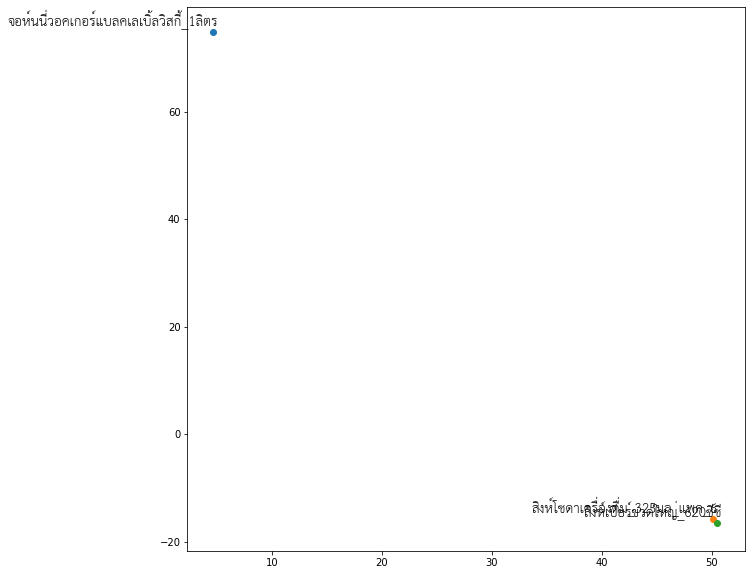

In [32]:
products=['จอห์นนี่วอคเกอร์แบลคเลเบิ้ลวิสกี้_1ลิตร','สิงห์โซดาเครื่องดื่ม_325มล_แพค_6','สิงห์เบียร์ขวดใหญ่_620ซีซี']
plot_with_labels(tsne_df.set_index('sku_name').loc[products].values[:,:2],products)

Soda + sugar => soft drink

In [27]:
model.most_similar_cosmul(positive=['สิงห์โซดาขวดเล็ก_325ซีซี','วังขนายน้ำตาลทรายแคลเซียม_500กรัม'],
                          topn=20)

[('โทมัสเฮนรี่เครื่องดื่มอัดก๊าซกลิ่นดอกเอลเดอร์_200มล', 0.745958149433136),
 ('โทมัสเฮนรี่เครื่องดื่มอัดก๊าซกลิ่นเชอร์รี่บลอสซัม_200มล',
  0.7414625883102417),
 ('ตราเสือยาหม่อง_194กรัม', 0.7382895350456238),
 ('มิตรผลน้ำเชื่อม_180มล', 0.7327777147293091),
 ('เอสโคล่า_250มล', 0.7288649678230286),
 ('เอสเครื่องดื่มอัดลมกลิ่นโคล่า_1ลิตร', 0.7262457013130188),
 ('ถูกใจน้ำมันปาล์ม_1ลิตร', 0.7257730960845947),
 ('เอสน้ำหวานกลิ่นเลมอนไลน์_16ลิตร', 0.7221303582191467),
 ('มิตรผลน้ำเชื่อม_850มล', 0.7213984131813049),
 ('เอสเพลย์เครื่องดื่มกลิ่นฮาวายเอี้ยนพันซ์_16ลิตร', 0.7213659286499023),
 ('เอสน้ำหวานกลิ่นสตรอเบอร์รี่_16ลิตร', 0.7191013693809509),
 ('เฟนติแมนส์จินเจอร์เบียร์เครื่องดื่มกลิ่นน้ำขิงอัดแก๊ส_275_มล',
  0.7143175005912781),
 ('เดอร์กี้แต่งกลิ่นรสวานิลลา_473มล', 0.7137290835380554),
 ('เอสโคล่า_515มล', 0.7136813998222351),
 ('เฟนติแมนส์จินเจอร์เอลเครื่องดื่มอัดแก๊สกลิ่นน้ำขิง_200มล',
  0.7120649814605713),
 ('ลินท็อปปิ้งกลิ่นคาราเมล_450มล', 0.7119836211204529),
 ('ชเวปส์น้ำโทนิค_3

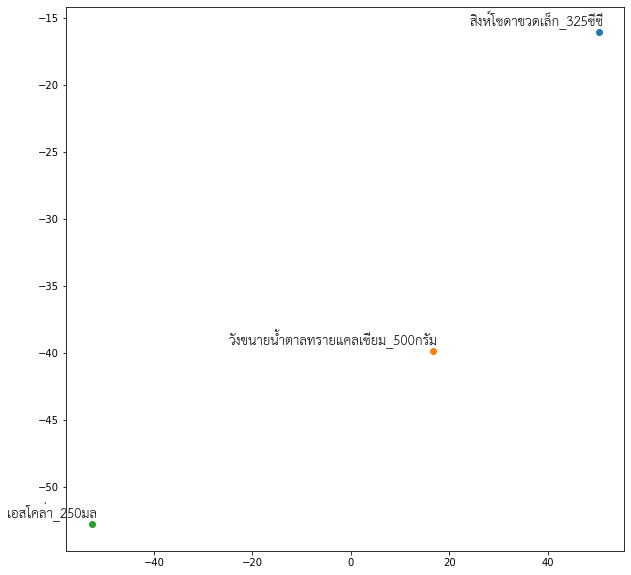

In [29]:
products=['สิงห์โซดาขวดเล็ก_325ซีซี','วังขนายน้ำตาลทรายแคลเซียม_500กรัม','เอสโคล่า_250มล']
plot_with_labels(tsne_df.set_index('sku_name').loc[products].values[:,:2],products)